# Convolutional Neural Networks:  An Introduction
----
We will use the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset to build a Simple Deep Learning model
that can recognise handwritten digits.

----
Author: Nishkrit Desai

In [1]:
# Make all the imports we will need to build our model
# These libraries give us all the good stuff we need to create "AI" 
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

#We need this library to plot our results and peek at some of the pictures
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Download the MNIST dataset
----

### A little bit about Testing and Training Data
The Training data is used to **teach** the model. Whereas, the testing data is used to **measure** how good (or bad) the model is.

**Rule of Thumb**: *Generally* you would want to divide the training and testing data in the ratio 70/30 of the entire population.

**Note**: There is also something called *validation data*, but this is not *very* relevant to us at the moment.

----
### About plotting the data
If the syntax used to plot the data seems a bit unfamiliar, don't panic.
> "You will become a normal thing over time!"

Sometimes it looks ugly, but matplotlib really helps us understand how the data looks.

----

### On the Size of the Images
Note that the size of the images in this case is 28x28 and they are all grayscale. This simplifies the data to fit our *simple* model. 

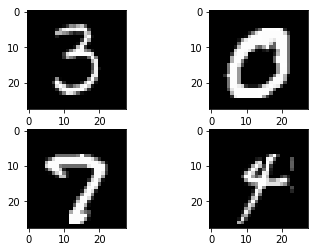

In [2]:
#This gives us the training and testing samples
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Let's plot some of these images in grayscale to see what they look like
#Get and store all the images in different subplots
for image in range(4):
    plt.subplot(221 + image)
    plt.imshow(x_train[image + 50], cmap=plt.get_cmap('gray'))

# Finally show all the images
plt.show()

#Finally lets save the testing dataset as a different variable so that we can plot our data later
orig_test_data_x, orig_test_data_y = x_test, y_test

### Defining Constants and Preprocessing Data
There are some important things to do before we can get to the good stuff.
Data preprocessing is one of the _most important_ tasks while dealing with Machine Learning models

----

#### What are our constants ?
Here we pick out things that don't change and store them in variables.
Examples: Image Size, Epochs, etc.

In this case, our constants are the Image Size, #Epochs, Batch Size, #Classes

----

#### How do we preprocess our data?

We have transform all our values to be in the given range (_why?_):
$$ x \thinspace \epsilon \thinspace [0, 1]$$

We use this formula to do what we stated above:
![Image](https://wikimedia.org/api/rest_v1/media/math/render/svg/0222c9472478eec2857b8bcbfa4148ece4a11b84)

Also just to mention two other terms: **One-hot vectors** and **Channel order preservation**

In [3]:
image_rows, image_cols = 28, 28

batch_size = 128
num_classes = 10
epochs = 6

# Reshape the data to have the shape: [samples][pixels][shape][shape]
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, image_rows, image_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, image_rows, image_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], image_rows, image_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], image_rows, image_cols, 1)
    input_shape = (image_rows, image_cols, 1)

# Normalize the pixel values of each image (our model is very "pick-y")
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

print("The labels initially look something like this: \n", y_train[0])

# Lets convert all the outputs to be categorical one-hot vectors
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#Peek at some of the data we have
#print("The Images now look something like this: ", x_train[0])
print("The one-hot vector labels look something like this: \n", y_train[0])
print("The shape of our input is: ", input_shape)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
The labels initially look something like this: 
 5
The one-hot vector labels look something like this: 
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The shape of our input is:  (28, 28, 1)


### Building the AI model
The people and Google have made it really easy for us to build models. But this section is the **most** important section of the entire project. 

----

We are going to build this model with python.
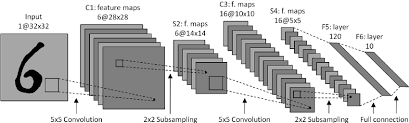

#### Step by Step, Line by Line, Image by Image, Layer by Layer

Since all of us are _true_ computer scientists, we will use a method to build the model. Instead of doing it line by line.

----

### A little bit on activations

For all the convolutional layers we will use the **ReLU** activation function. It looks something like this:

$$ R(z) \thinspace = \thinspace max(0, z) $$

For the last fully connected layer we are going to use the friendly-neighbourhood **Softmax** function:

$$ \sigma(z) \thinspace = \thinspace \frac {1}{1 + e^{-z}} $$

----

### The Dropout layer

This is used to make sure that the Neural Net does _not_ get "addicted" to certain patterns/images or pixel values

![DropoutImage](https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/more_images/Dropout.png)

----

### What the Kernels (Weights) look like

_If_ we were to visualize the weights that the trained model gives us, they would look something like this:

<img src="http://cs231n.github.io/assets/cnnvis/filt1.jpeg" alt="filt1" width="200" height="400"/>

We can also see that as we go to deeper layers the weights become more _complex_ and _intricate_. More importantly, they become more _subtle_, this is clearly seen in the image below. These are the weights after activations have been applied.

<img src="http://cs231n.github.io/assets/cnnvis/act1.jpeg" alt="act1" width="200" height="400"/>

Similarly the weights of layer 5 look something like this (Again, this is post-activation):

<img src="http://cs231n.github.io/assets/cnnvis/act2.jpeg" alt="act2" width="200" height="400"/>

----
### What does all this add up to?
 
All this math and code, is to do **one** _simple_ thing: Simulate _how_ humans _see_ (well, on some level)...
 
----
Now that we have created the Neural Net, let us begin to make it smart. Onward and Upward!

**Note** : _Look at the number of trainable parameter within our Neural Network. Mind Blowing, Isn't it?_

In [4]:
#Build the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

print("Summary of model: ")
model.summary()

Summary of model: 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0 

### Optimization, Optimization and more Optimization ...
Now that the Neural Net exists. We need to **train** it so that it becomes _good_ at seeing numbers.

### Loss function to Optimize our model
We will be using the Categorical Crossentropy Loss function to Optimize our model. Don't panic:

![CrossEntropy](https://gombru.github.io/assets/cross_entropy_loss/intro.png)

**Food for thought** : Think about what we are trying to do with the loss function.(This is the _very_ basis of a Neural Net)

### Let's talk Strategy
Even with a strong mathematical backing, our model still needs to be trained **optimally** (_why?_)
To do this we need to use a gradient descent optimization technique.
Here we will use **AdaDelta**.

![Adadelta](https://i.stack.imgur.com/aojCe.png)

This algorithm will (hopefully) help us find the _global_ minimum of your loss function

![GlobalMin](https://qph.fs.quoracdn.net/main-qimg-7adad11c6ee947a96e917e2a8205392d.webp)

----

In [5]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 44s 732us/step - loss: 0.2664 - acc: 0.9187 - val_loss: 0.0637 - val_acc: 0.9803: 0.2706 
Epoch 2/6
60000/60000 [==============================] - 34s 569us/step - loss: 0.0909 - acc: 0.9735 - val_loss: 0.0454 - val_acc: 0.9839
Epoch 3/6
60000/60000 [==============================] - 34s 572us/step - loss: 0.0660 - acc: 0.9803 - val_loss: 0.0413 - val_acc: 0.9863 - ETA: 1s 
Epoch 4/6
60000/60000 [==============================] - 35s 581us/step - loss: 0.0542 - acc: 0.9840 - val_loss: 0.0330 - val_acc: 0.9882
Epoch 5/6
60000/60000 [==============================] - 36s 599us/step - loss: 0.0466 - acc: 0.9864 - val_loss: 0.0382 - val_acc: 0.9871
Epoch 6/6
60000/60000 [==============================] - 34s 560us/step - loss: 0.0406 - acc: 0.9880 - val_loss: 0.0281 - val_acc: 0.99020398


### Evaluating the accuracy of the Neural Net
----

We will use the accuracy metric to determine how good our model is ( >90% is _really_ good). All the measurements will be done using the testing dataset.

Let's see how we did!

In [6]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0]) #The value of our loss function on the testing dataset
print('Test accuracy: %.3f%%'%(score[1] * 100)) # The accuracy of the model based on the number of correct predictions
#Do these numbers seem suspicious? If so, why?

Test loss: 0.028128457714716205
Test accuracy: 99.020%


### Using the model to make actual predictions

----

We will look at the image and try to see what is written in it (with our eyes). Then, we will give the same image to the computer, and ask it what it sees. Let's have a look at what the results are ...

**Caution**: Beware of _one-hot_ encoded vectors while formatting the output


**Food for thought**: _How can the output be made to be more attractive/interactive?_

----

**Note**: _To "look" at a different image, you can change the value of_ `image_index` _to be anything between 1 and 10000_

This is the number we will show the computer... 



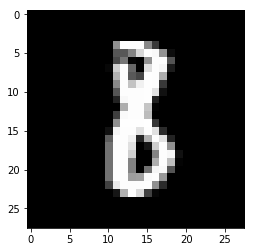


============= PREDICTION ================

The number in the image is likely to be:  8


In [7]:
image_index = 257
#Lets plot one of the testing images too (we will save this for later)
plot_test_image = orig_test_data_x[image_index] #Pick the 258th Image
test_label = orig_test_data_y[image_index] #Pick the corresponding label

#This is the image we will give the model
test_image = np.expand_dims(x_test[image_index, :, :, :], axis=0)

print("This is the number we will show the computer... \n")
plt.imshow(plot_test_image, cmap=plt.get_cmap('gray'))
plt.show()

#results = model.predict(test_image)
#print("I am looking at the number: ", results)
#Why is the above output so weird looking? Think about the what predict method might be doing...

result = model.predict_classes(test_image)[0]
print("\n============= PREDICTION ================\n")
print("The number in the image is likely to be: ", result)

#Show the actual value of the label (for debugging)
#print("The label of the image is: ", test_label)